In [132]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD , Adam, RMSprop
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [133]:
from glob import glob
from PIL import Image 

In [3]:
pwd

'C:\\Users\\82102\\machine_test'

### unzip

In [2]:
path_to_zip_file = '../machine_test/train.zip'
directory_to_extract_to = '../machine_test'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [173]:
path_to_zip_file2 = '../machine_test/test.zip'
directory_to_extract_to = '../machine_test'

import zipfile
with zipfile.ZipFile(path_to_zip_file2, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

### label 부여 및 이미지 처리

In [134]:
cate_dir = '../machine_test/train'
categories = ['dog','elephant','giraffe','guitar','horse','house','person']
size = len(categories)

image_w = 64
image_h = 64

pixels = image_w * image_h * 3
x = []
y = []

for idx, cat in enumerate(categories) :
    label = [0 for i in range(size)]
    label[idx] = 1
#     label = idx
    
    image_dir = cate_dir + '/' + cat
    files = glob(image_dir+'/*.jpg')
    
    for i,f in enumerate(files) :
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        x.append(data)
        y.append(label)
x = np.array(x)
y = np.array(y)      
x_train, x_test, y_train, y_test = train_test_split(x, y)
xy = (x_train, x_test, y_train, y_test)
np.save("../machine_test/multi_image_data.npy", xy)
print("ok", len(y))

ok 1698


In [136]:
import numpy as np
x_train, x_test, y_train, y_test = np.load('../machine_test/multi_image_data.npy',allow_pickle = True)

### split

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x, test_size=0.2)
y_train, y_test = train_test_split(y, test_size=0.2)

print(len(x_train), len(y_train), len(x_test), len(y_test))
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

1358 1358 340 340


((1358, 64, 64, 3), (1358, 7), (340, 64, 64, 3), (340, 7))

In [137]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1273, 64, 64, 3), (1273, 7), (425, 64, 64, 3), (425, 7))

### 데이터 체크

[0 0 0 0 1 0 0]


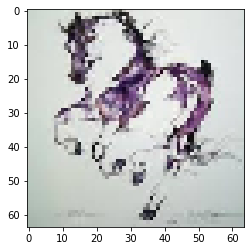

In [138]:
plt.imshow(x_train[10], cmap=plt.cm.binary)
print(y_train[10])
plt.show()

### 학습

In [139]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [140]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1273, 64, 64, 3), (1273, 7), (425, 64, 64, 3), (425, 7))

In [141]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding="same",activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(size,activation='softmax'))
          
# optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = 'adam', 
              loss      = 'categorical_crossentropy' , 
              metrics   = ['accuracy'] ) 
model_path = ''
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [82]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding="same",activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(size,activation='softmax'))
          
# optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = 'adam', 
              loss      = 'categorical_crossentropy' , 
              metrics   = ['accuracy'] ) 
model_path = ''
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)





In [142]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping],use_multiprocessing=True)

Train on 1273 samples, validate on 425 samples
Epoch 1/100
1216/1273 [===========================>..] - ETA: 0s - loss: 2.0453 - accuracy: 0.1982
Epoch 00001: val_loss improved from inf to 1.92932, saving model to 
INFO:tensorflow:Assets written to: assets
1273/1273 [==============================] - 12s 9ms/sample - loss: 2.0385 - accuracy: 0.2050 - val_loss: 1.9293 - val_accuracy: 0.2400
Epoch 2/100
1216/1273 [===========================>..] - ETA: 0s - loss: 1.8958 - accuracy: 0.2319
Epoch 00002: val_loss improved from 1.92932 to 1.91560, saving model to 
INFO:tensorflow:Assets written to: assets
1273/1273 [==============================] - 10s 8ms/sample - loss: 1.8967 - accuracy: 0.2294 - val_loss: 1.9156 - val_accuracy: 0.2447
Epoch 3/100
1216/1273 [===========================>..] - ETA: 0s - loss: 1.8671 - accuracy: 0.2467
Epoch 00003: val_loss improved from 1.91560 to 1.87540, saving model to 
INFO:tensorflow:Assets written to: assets
1273/1273 [==============================] 

In [143]:
result = model.evaluate(x_test, y_test)
print(result)
print("accuracy : ", result[1])

425/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.7346292164746453, 0.41882354]
accuracy :  0.41882354


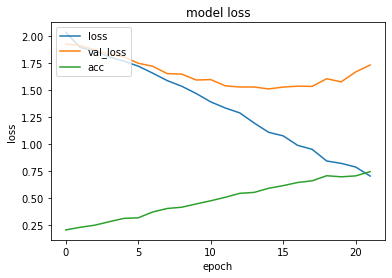

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc='upper left')
plt.show()

### 테스트

In [145]:
import tensorflow as tf

In [146]:
seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

caltech_dir = 'test/0'


image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob(caltech_dir+"/*.jpg")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)


X = np.array(X)
X = X.astype(float) / 255

# print(X)
prediction = model.predict_classes(X)
cnt = 0
final = []
for i in prediction:
    final.append(i)

### 결과값 csv로 저장

In [147]:
df = pd.DataFrame(final)

In [148]:
df.columns = ['answer value']

In [150]:
df

,answer value
0,6
1,6
2,0
3,0
4,6
...,...
345,6
346,0
347,6
348,0


In [152]:
df.to_csv("test_answer.csv")